In [1]:
import numpy as np
import pandas as pd
import os
import re
import math

import matplotlib.pyplot as plt
import seaborn as sns

p_data_raw       = os.path.abspath('../data/raw') # raw data path
p_data_processed = os.path.abspath('../data/processed') # processed data path
p_data_cleaned   = os.path.abspath('../data/cleaned') # clearned data path
p_data_src       = os.path.abspath('../data/src') # src data path

In [2]:
# ratingmat_f = pd.read_csv(p_data_processed+'/ratingmat_f.csv')
# nk_ratingmat_f = pd.read_csv(p_data_processed+'/nk_ratingmat_f.csv')
k_ratingmat_f = pd.read_csv(p_data_processed+'/k_ratingmat_f.csv')
k_ratings_f = pd.read_csv(p_data_processed+'/k_ratings_f_v1.csv')

In [3]:
df_movie = pd.read_csv(p_data_raw+'/ml-25m/movies.csv') # movie list

In [4]:
df_ratings = k_ratings_f[['userId','movieId','rating_x','title']]
df_ratings.rename(columns={'rating_x':'rating'}, inplace=True)

df_movie_features = k_ratingmat_f.fillna(0)

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [5]:
R = df_movie_features.as_matrix()
user_ratings_mean = np.mean(R, axis = 1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [7]:
df_ratings

,userId,movieId,rating,title
0,181,8014,1.5,"Spring, Summer, Fall, Winter... and Spring (Bo..."
1,181,27773,3.5,Old Boy (2003)
2,181,107406,1.0,Snowpiercer (2013)
3,181,158783,2.0,The Handmaiden (2016)
4,181,27592,2.0,Sympathy for Mr. Vengeance (Boksuneun naui geo...
5,181,51709,1.0,"Host, The (Gwoemul) (2006)"
6,181,82667,0.5,I Saw the Devil (Akmareul boatda) (2010)
7,181,159061,0.5,The Wailing (2016)
8,181,202439,1.5,Parasite (2019)
9,541,8014,4.5,"Spring, Summer, Fall, Winter... and Spring (Bo..."


In [6]:
# filter
min_movie_ratings = 10
filter_movies = df_ratings['movieId'].value_counts() > min_movie_ratings
filter_movies = filter_movies[filter_movies].index.tolist()

min_user_ratings = 10
filter_users = df_ratings['userId'].value_counts() > min_user_ratings
filter_users = filter_users[filter_users].index.tolist()

df_ratings_new = df_ratings[(df_ratings['movieId'].isin(filter_movies)) & (df_ratings['userId'].isin(filter_users))]

print('The original data frame shape:\t{}'.format(df_ratings.shape))
print('The new data frame shape:\t{}'.format(df_ratings_new.shape))

The original data frame shape:	(31769, 4)
The new data frame shape:	(9863, 4)


In [7]:
import pandas as pd
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(0, 4))
data = Dataset.load_from_df(df_ratings_new[['userId', 'movieId', 'rating']], reader)

benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

ImportError: cannot import name 'Random' from 'surprise' (//anaconda3/lib/python3.7/site-packages/surprise/__init__.py)

In [26]:
# print('Using ALS')
# bsl_options = {'method': 'als',
#                'n_epochs': 5,
#                'reg_u': 12,
#                'reg_i': 5
#                }
# algo = BaselineOnly(bsl_options=bsl_options)
# cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)

Using ALS
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


{'test_rmse': array([0.72865761, 0.73733015, 0.71105716]),
 'fit_time': (0.0047149658203125, 0.005465984344482422, 0.004378795623779297),
 'test_time': (0.013155937194824219,
  0.013393163681030273,
  0.054856300354003906)}

In [27]:
print('Using SVDpp')
# bsl_options = {'method': 'als',
#                'n_epochs': 5,
#                'reg_u': 12,
#                'reg_i': 5
#                }
algo = SVDpp()
cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)

Using SVDpp


{'test_rmse': array([0.70810345, 0.69592616, 0.69227039]),
 'fit_time': (2.760850191116333, 2.6781399250030518, 2.6459829807281494),
 'test_time': (0.12721800804138184, 0.11957097053527832, 0.1352860927581787)}

In [29]:
trainset, testset = train_test_split(data, test_size=0.25)
algo = SVDpp()
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

RMSE: 0.7004


0.7004276748545343

In [32]:
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)
best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]

In [33]:
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
1631,63831,81182,4.0,4.0,{'was_impossible': False},29,23,0.0
1005,5072,8014,4.0,4.0,{'was_impossible': False},12,188,0.0
176,12244,82667,4.0,4.0,{'was_impossible': False},88,212,0.0
1018,60614,27773,4.0,4.0,{'was_impossible': False},15,328,0.0
1971,27385,73808,4.0,4.0,{'was_impossible': False},38,177,0.0
1970,90691,158783,4.0,4.0,{'was_impossible': False},32,149,0.0
1057,147316,202439,4.0,4.0,{'was_impossible': False},11,64,0.0
1967,105624,158783,4.0,4.0,{'was_impossible': False},15,149,0.0
1070,14539,73808,4.0,4.0,{'was_impossible': False},14,177,0.0
1964,111259,30803,4.0,4.0,{'was_impossible': False},15,167,0.0


In [35]:
worst_predictions

,uid,iid,rui,est,details,Iu,Ui,err
1582,137345,33487,5.0,2.270897,{'was_impossible': False},8,46,2.729103
319,34146,27397,1.0,3.750683,{'was_impossible': False},27,146,2.750683
2009,122853,32239,0.5,3.302971,{'was_impossible': False},14,64,2.802971
886,151656,187959,0.5,3.376099,{'was_impossible': False},5,8,2.876099
2077,151656,144568,0.5,3.524997,{'was_impossible': False},5,9,3.024997
1140,34334,135290,0.5,3.666676,{'was_impossible': False},16,6,3.166676
564,89931,51709,0.5,3.690520,{'was_impossible': False},10,217,3.190520
152,10919,27627,0.5,3.707696,{'was_impossible': False},23,36,3.207696
416,2938,107406,0.5,3.786205,{'was_impossible': False},18,234,3.286205
2349,140463,27592,0.5,3.838603,{'was_impossible': False},10,230,3.338603


<IPython.core.display.Javascript object>


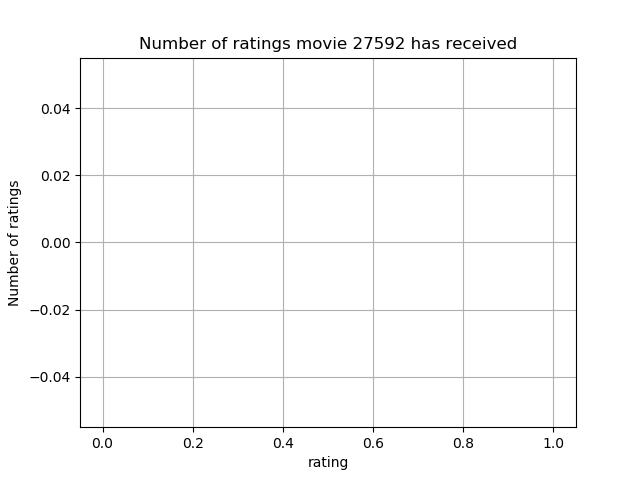

In [40]:
import matplotlib.pyplot as plt
%matplotlib notebook
df_ratings_new.loc[df_ratings_new['movieId'] == '27592']['rating'].hist()
plt.xlabel('rating')
plt.ylabel('Number of ratings')
plt.title('Number of ratings movie 27592 has received')
plt.show();

In [46]:
df_ratings_new.loc[df_ratings_new['movieId'] == '81182']['rating']

Series([], Name: rating, dtype: float64)

In [43]:
df_ratings_new

,userId,movieId,rating,title
24,847,8014,4.0,"Spring, Summer, Fall, Winter... and Spring (Bo..."
25,847,107406,3.5,Snowpiercer (2013)
26,847,30803,4.5,3-Iron (Bin-jip) (2004)
27,847,76091,4.0,Mother (Madeo) (2009)
28,847,8805,1.0,Attack the Gas Station! (Juyuso seubgyuksageun...
29,847,27627,4.0,Oasis (2002)
30,847,52617,4.0,Woman on the Beach (Haebyeonui yeoin) (2006)
31,847,55705,4.5,Secret Sunshine (Milyang) (2007)
32,847,84116,5.0,Poetry (Shi) (2010)
33,847,160892,4.5,"Right Now, Wrong Then (2015)"


In [7]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R_demeaned, k = 50)
sigma = np.diag(sigma)
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [16]:
df_movie_features.columns

Index(['652', '4026', '5526', '5687', '5821', '6161', '6210', '6648', '7982',
       '8014',
       ...
       '192265', '192749', '193904', '195343', '195977', '197713', '199430',
       '199992', '202439', '205082'],
      dtype='object', length=280)

In [11]:
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = df_movie_features.columns)
#preds_df

,652,4026,5526,5687,5821,6161,6210,6648,7982,8014,...,192265,192749,193904,195343,195977,197713,199430,199992,202439,205082
0,-0.003426,-0.003703,-0.000597,0.005337,-0.002621,0.000502,-0.003328,-0.002572,0.000404,0.000064,...,0.007377,0.004943,0.004216,0.002970,0.001603,-0.000103,-0.000578,-0.000872,0.000073,0.004644
1,-0.002942,-0.003230,0.000331,0.000674,-0.000395,-0.000660,-0.001249,0.000337,0.000468,-0.000013,...,0.000361,0.000749,0.002754,-0.001245,0.000280,-0.000526,0.000824,0.000363,-0.000071,-0.000155
2,-0.015460,-0.034377,-0.011835,0.036007,-0.003916,0.012667,0.006654,-0.017030,-0.001366,-0.000333,...,-0.000530,-0.002377,0.000807,-0.020597,-0.001663,0.012564,-0.007903,0.000916,-0.001021,-0.003899
3,0.002553,-0.007199,-0.005149,0.000189,-0.004113,0.003439,-0.009943,-0.000148,-0.001444,0.000233,...,0.001270,-0.008368,0.000341,0.001220,-0.008089,-0.000806,-0.003887,-0.006120,0.001019,-0.006168
4,-0.001961,-0.002153,0.000221,0.000449,-0.000263,-0.000440,-0.000832,0.000225,0.000312,-0.000009,...,0.000241,0.000499,0.001836,-0.000830,0.000187,-0.000351,0.000549,0.000242,-0.000047,-0.000104
5,-0.003269,-0.003589,0.000368,0.000749,-0.000439,-0.000733,-0.001387,0.000375,0.000520,-0.000015,...,0.000401,0.000832,0.003060,-0.001384,0.000312,-0.000584,0.000915,0.000404,-0.000079,-0.000173
6,0.002751,-0.002350,-0.002180,0.000241,0.001211,-0.005093,-0.000096,0.005839,0.000040,1.499623,...,0.018123,0.005295,0.002959,-0.000328,-0.000160,-0.000439,0.002569,0.000067,1.495805,-0.003903
7,-0.000015,0.000401,0.001353,0.015097,0.012138,-0.029739,0.000736,-0.005129,-0.000482,0.000295,...,0.015940,0.016050,0.001234,0.002728,0.003642,-0.009773,-0.002402,0.007384,0.002328,-0.000238
8,0.096697,0.059468,0.052660,-0.015920,0.117452,0.020056,0.128761,0.099137,-0.026934,-0.007272,...,0.066807,0.008422,-0.000988,-0.021754,-0.004749,-0.038876,-0.040606,0.010253,-0.023850,0.004820
9,-0.002942,-0.003230,0.000331,0.000674,-0.000395,-0.000660,-0.001249,0.000337,0.000468,-0.000013,...,0.000361,0.000749,0.002754,-0.001245,0.000280,-0.000526,0.000824,0.000363,-0.000071,-0.000155


In [18]:
def recommend_movies(preds_df, userIndex, movies_df, original_ratings_df, num_recommendations=5):    
    user_row_number = userIndex
    sorted_user_predictions = preds_df.iloc[user_row_number].sort_values(ascending=False)
    user_data = original_ratings_df[original_ratings_df.index==user_row_number]
    recommendations = pd.DataFrame(sorted_user_predictions).reset_index().astype(int).merge(
                (movies_df[~movies_df['movieId'].isin(user_data['movieId'])]),left_on='index',right_on='movieId').rename(
                columns = {user_row_number: 'Predictions'}).drop('index',axis=1).iloc[:num_recommendations, :-1]
    
    print(user_data)
    print('\n')
    print(recommendations)

    return user_data, recommendations

In [19]:
(user, recommendations) = recommend_movies(preds_df, preds_df['27773'].idxmax(), df_movie, df_ratings, num_recommendations=5)

      userId  movieId  rating  \
3228   57548    66785     0.5   

                                                  title  
3228  Good, the Bad, the Weird, The (Joheunnom nabbe...  


   Predictions  movieId                                              title
0            5    27773                                     Old Boy (2003)
1            5   202439                                    Parasite (2019)
2            4     8014  Spring, Summer, Fall, Winter... and Spring (Bo...
3            2    31364         Memories of Murder (Salinui chueok) (2003)
4            1    53161  I'm a Cyborg, But That's OK (Saibogujiman kwen...


In [17]:
df_ratings

,userId,movieId,rating,title
0,181,8014,1.5,"Spring, Summer, Fall, Winter... and Spring (Bo..."
1,181,27773,3.5,Old Boy (2003)
2,181,107406,1.0,Snowpiercer (2013)
3,181,158783,2.0,The Handmaiden (2016)
4,181,27592,2.0,Sympathy for Mr. Vengeance (Boksuneun naui geo...
5,181,51709,1.0,"Host, The (Gwoemul) (2006)"
6,181,82667,0.5,I Saw the Devil (Akmareul boatda) (2010)
7,181,159061,0.5,The Wailing (2016)
8,181,202439,1.5,Parasite (2019)
9,541,8014,4.5,"Spring, Summer, Fall, Winter... and Spring (Bo..."


In [237]:
######################
# movie level
######################

k_moviemat = k_ratings_f.pivot_table(index='userId',columns='title',values='rating_x')
ratings_final = pd.DataFrame(k_ratings_f.groupby('title')['rating_x'].mean())
ratings_final['num of ratings'] = pd.DataFrame(k_ratings_f.groupby('title')['rating_x'].count())
def corr_list(movie_nm):
    user_ratings = k_moviemat[movie_nm]
    similar = k_moviemat.corrwith(user_ratings)
    corr = pd.DataFrame(similar, columns=['Correlation'])
    corr.dropna(inplace=True)
    corr = corr.join(ratings_final['num of ratings'])
    corr_list = corr[corr['num of ratings']>100].sort_values('Correlation',ascending=False)
    return corr_list

corr_list('Old Boy (2003)').head(20)

,Correlation,num of ratings
title,,
Old Boy (2003),1.000000,6432
My Sassy Girl (Yeopgijeogin geunyeo) (2001),0.495440,287
New World (Shin-sae-gye) (2013),0.481322,151
Wonderful Days (a.k.a. Sky Blue) (2003),0.477553,169
"Yellow Sea, The (a.k.a. The Murderer) (Hwanghae) (2010)",0.469648,115
Sympathy for Mr. Vengeance (Boksuneun naui geot) (2002),0.461278,1051
"Chaser, The (Chugyeogja) (2008)",0.424454,484
Lady Vengeance (Sympathy for Lady Vengeance) (Chinjeolhan geumjassi) (2005),0.423850,1092
The Wailing (2016),0.423090,307


In [238]:
top = corr_list('Old Boy (2003)').head(3)

In [239]:
top

,Correlation,num of ratings
title,,
Old Boy (2003),1.000000,6432
My Sassy Girl (Yeopgijeogin geunyeo) (2001),0.495440,287
New World (Shin-sae-gye) (2013),0.481322,151


In [241]:
df = pd.read_csv(p_data_raw+'/imdb_kr.csv')

In [269]:
df['title'] = df['name']+' '+df['year']
#==top.index[0]

In [272]:
df[df['title']==top.index[0]]

,name,year,rating,metascore,vote,imdb_id,poster,genre,certificate,runtime,director_actor,story,imdbId,title


In [273]:
df['title']

0                           The Stray Bullet (1961)
1                                  Akui ggot (1961)
2             Yongary, Monster from the Deep (1967)
3                      The King with My Face (1967)
4                              Myonuriui Han (1971)
5                         Northeast of Seoul (1974)
6                            The Association (1974)
7                                        Ape (1976)
8       Bruce Lee Fights Back from the Grave (1976)
9               Bruce and Shao-lin Kung Fu 2 (1978)
10                                 Genealogy (1979)
11                        Naeileum ssangdali (1978)
12                           Crocodile Fangs (1978)
13                     Magnificent Wonderman (1980)
14                            The Divine Bow (1979)
15                         The Wealthy Woman (1980)
16                 Dolaon solimsa jubangjang (1980)
17                          Pursuit of Death (1980)
18           Grand Master of Shaolin Kung Fu (1978)
19          